## Wine Review Analysis
### Author: Ryan Berns
---

#### Load dataset and required packages

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import numpy as np
import sklearn as sk
import sys
import statsmodels
from ggplot import ggplot
from ggplot import *
print(sys.version)

C:\Anaconda2\envs\py36\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Anaconda2\envs\py36\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Anaconda2\envs\py36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


In [2]:
base = pd.read_csv('~/Documents/Fordham/Text Analytics/Group Project/wineReviewGit/winemag-data-130k-v2.txt',sep='\t')

In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


### Summary Statistics

In [4]:
base.describe(include = 'all')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129971.000000,129908,129971,92506,129971.000000,120975.000000,129908,108724,50511,103727,98758,129971,129970,129971
unique,NaN,43,119955,37976,NaN,NaN,425,1229,17,19,15,118840,707,16757
top,NaN,US,"Cigar box, café au lait, and dried tobacco aro...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,NaN,54504,3,2009,NaN,NaN,36247,4480,11065,25514,25514,11,13272,222
mean,64985.000000,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,37519.540256,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32492.500000,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,64985.000000,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,97477.500000,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
base['variety'].value_counts().head(30)

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer              

##### Top 10 Countries

In [6]:
topCountryL = base['country'].value_counts(ascending=False).reset_index().head(10)['index'].tolist()
topCountry = base[(base['country'].isin(topCountryL))]
base['country'].value_counts(ascending=False).head(15)

US              54504
France          22093
Italy           19540
Spain            6645
Portugal         5691
Chile            4472
Argentina        3800
Austria          3345
Australia        2329
Germany          2165
New Zealand      1419
South Africa     1401
Israel            505
Greece            466
Canada            257
Name: country, dtype: int64

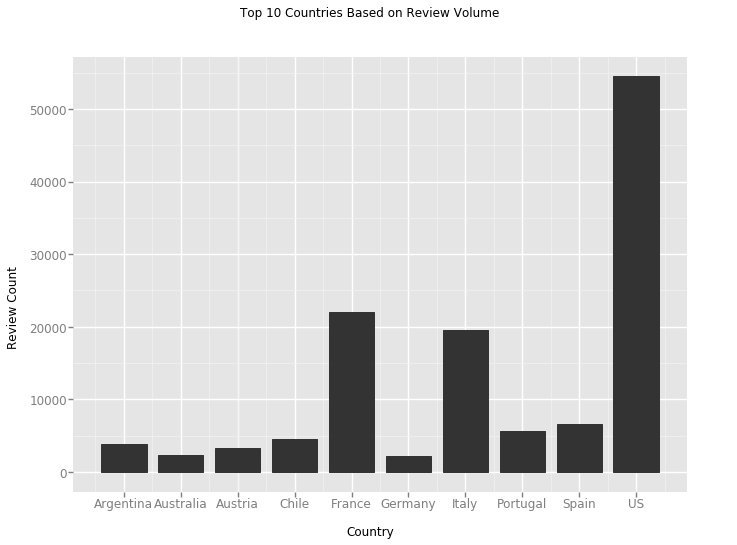

<ggplot: (126128934927)>

In [7]:
mpl.rcParams["figure.figsize"] = "15, 8"
ggplot(aes(x='factor(country)'), data=topCountry) + \
     geom_bar() + \
     xlab('Country') +\
     ylab('Review Count') +\
     ggtitle('Top 10 Countries Based on Review Volume')

#### Top Varieties

In [8]:
topVarietyL = base['variety'].value_counts(ascending=False).reset_index().head(10)['index'].tolist()
topVariety = base[(base['variety'].isin(topVarietyL))]
base['variety'].value_counts(ascending=False).head(15)

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Nebbiolo                     2804
Zinfandel                    2714
Sangiovese                   2707
Malbec                       2652
Portuguese Red               2466
Name: variety, dtype: int64

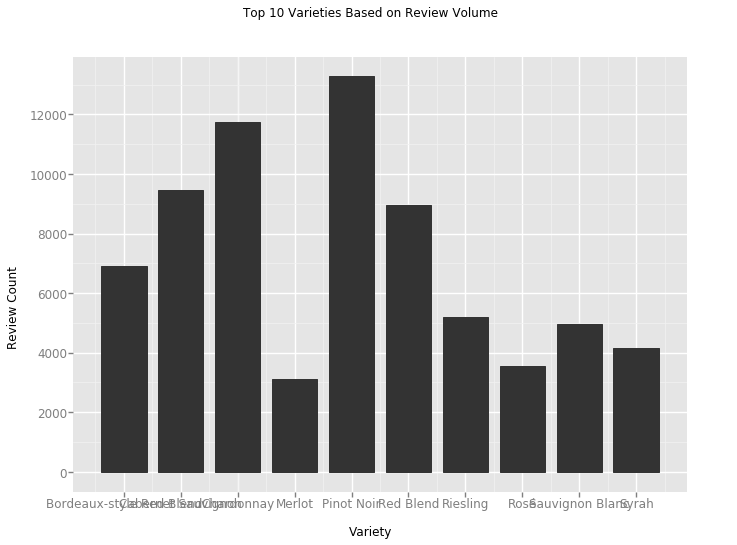

<ggplot: (126128934962)>

In [9]:
mpl.rcParams["figure.figsize"] = "30, 8"
ggplot(aes(x='factor(variety)'), data=topVariety) + \
     geom_bar() + \
     xlab('Variety') +\
     ylab('Review Count') +\
     ggtitle('Top 10 Varieties Based on Review Volume')

In [10]:
baseUS = base[(base['country']=="US")]
top15States = baseUS['province'].value_counts(ascending=False).reset_index().head(10)['index'].tolist()

In [11]:
basUSTop15 = baseUS[(baseUS['province'].isin(top15States))]

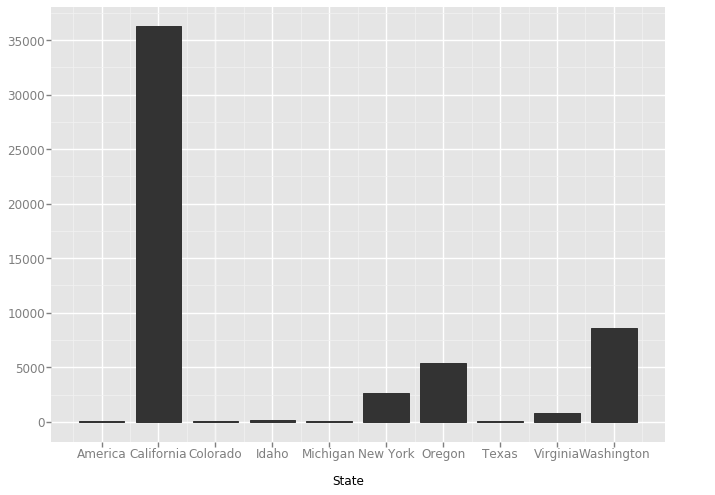

<ggplot: (-9223371910724019859)>

In [12]:
mpl.rcParams["figure.figsize"] = "15, 8"
ggplot(aes(x='factor(province)'), data=basUSTop15) + \
     geom_bar() + \
     xlab("State")
#      theme_xkcd()

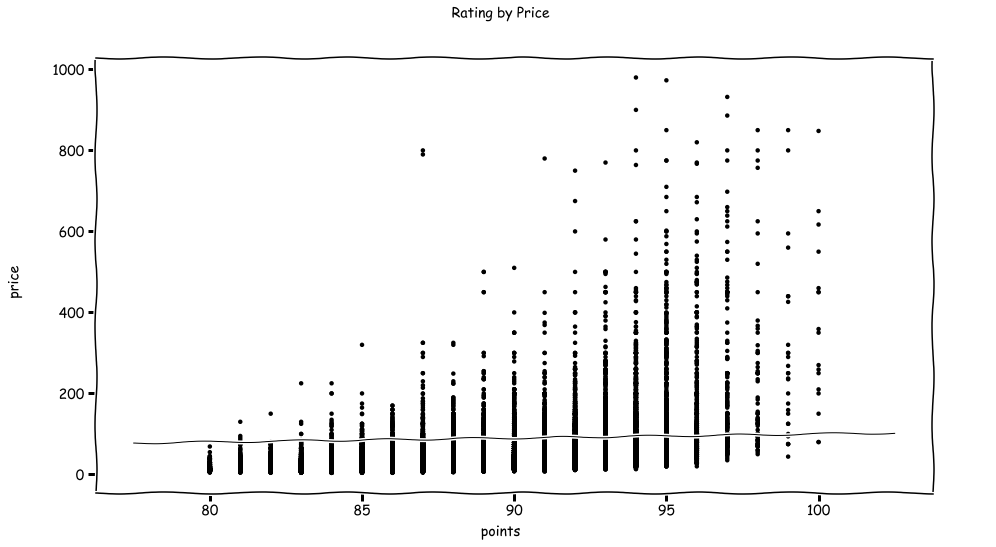

<ggplot: (-9223371910720420422)>

In [13]:
baseP = base[(base['price'] < 1000)]
ggplot(baseP, aes('points', 'price')) + \
  geom_point(colour='steelblue') +\
    ggtitle('Rating by Price') +\
    geom_abline() +\
    theme_xkcd()

---
### Text Analysis

In [14]:
import nltk
from nltk import FreqDist

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english')
tvec_weights = tvec.fit_transform(base['description'].dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(10)

,term,weight
467,fruits,0.019302
1089,sweet,0.018744
631,light,0.018511
286,crisp,0.018417
76,apple,0.018295
1117,texture,0.017567
139,blackberry,0.017137
1204,white,0.017094
233,citrus,0.016555
758,offers,0.016508


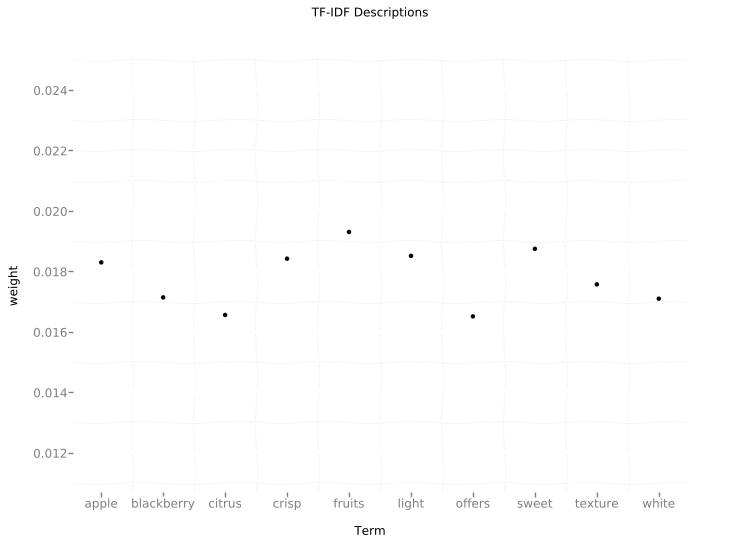

<ggplot: (126142944397)>

In [16]:
mpl.rcParams["figure.figsize"] = "10, 4"
test = weights_df.sort_values(by='weight', ascending=False).reset_index().head(10)
test.dtypes
ggplot(aes('factor(term)','weight'), data=test) +\
    geom_point() +\
    theme_bw() +\
    xlab('Term') +\
    ggtitle("TF-IDF Descriptions")

In [17]:
raw1 = base['description'].to_string()
raw = raw1.replace('\n',' ') 
tokens = nltk.word_tokenize(raw)
type(tokens)

list

In [18]:
#change all tokens into lower case 
words1 = [w.lower() for w in tokens]   #list comprehension 

#only keep text words, no numbers 
words2 = [w for w in words1 if w.isalpha()]

In [19]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english') #use the NLTK stopwords
words_nostopwords = [w for w in words2 if w not in stopwords]

In [20]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_words = []
for x in words_nostopwords:
    stemmed_words.append(ps.stem(x))

In [21]:
#generate a frequency dictionary for all tokens 
freq_nostw = FreqDist(stemmed_words)

#sort the frequency list in decending order
sorted_freq_nostw = sorted(freq_nostw.items(),key = lambda k:k[1], reverse = True)
for x in sorted_freq_nostw[0:10]:
    print(x[0],'\t',x[1])

wine 	 26235
aroma 	 20123
ripe 	 8009
blend 	 7406
fruit 	 6979
rich 	 5089
nose 	 5016
red 	 4274
dri 	 4198
note 	 4015


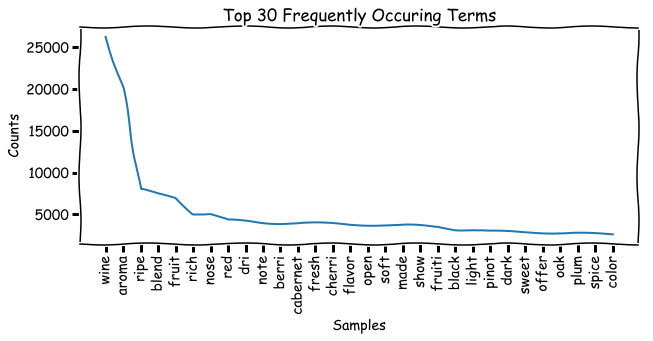

In [22]:
freq_nostw.plot(30,title="Top 30 Frequently Occuring Terms")

In [23]:
test = words2[0:5]
list(filter(lambda a: a != 'tropical', test))

['aromas', 'include', 'fruit', 'broom']

In [24]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
def word_counter(df,column,value):
    df2 = df[(df[column]==value)]
    valueNew = value.lower()
    raw1 = df2['description'].to_string()
    raw = raw1.replace('\n',' ') 
    tokens = nltk.word_tokenize(raw)
    type(tokens)
    #change all tokens into lower case 
    words1 = [w.lower() for w in tokens]   #list comprehension 
    #only keep text words, no numbers 
    words2 = [w for w in words1 if w.isalpha()]
    words3 = list(filter(lambda a: a != valueNew, words2))
    words4 = list(filter(lambda a: a != 'wine', words3))
    stopwords2 = stopwords.words('english') #use the NLTK stopwords
    words_nostopwords = [w for w in words4 if w not in stopwords2]
    ps = PorterStemmer()
    stemmed_words = []
    for x in words_nostopwords:
        stemmed_words.append(ps.stem(x))
    freq_nostw = FreqDist(stemmed_words)
    #sort the frequency list in decending order
    sorted_freq_nostw = sorted(freq_nostw.items(),key = lambda k:k[1], reverse = True)
    for x in sorted_freq_nostw[0:20]:
        print(x[0],'\t',x[1])
    freq_nostw.plot(30,title="Top 30 Frequently Occuring Terms")

aroma 	 478
cherri 	 242
fruit 	 175
dri 	 173
soft 	 158
flavor 	 156
red 	 144
plum 	 143
ripe 	 139
black 	 138
note 	 113
rich 	 113
nose 	 108
good 	 101
dark 	 97
berri 	 91
show 	 91
spice 	 88
sweet 	 86
oak 	 84


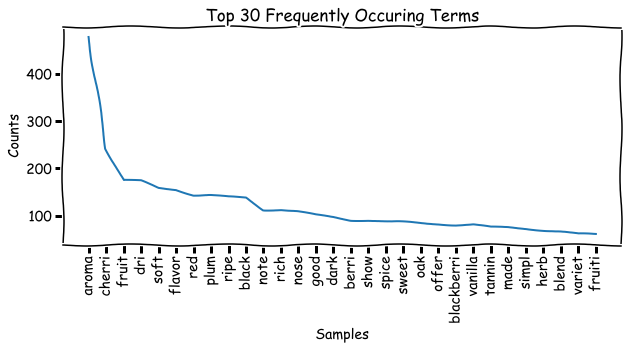

In [25]:
word_counter(base,'variety','Merlot')

ripe 	 2782
rich 	 1736
fruiti 	 1692
fruit 	 1666
soft 	 1390
fresh 	 1050
full 	 1001
crisp 	 956
structur 	 928
tannin 	 899
blend 	 835
red 	 759
light 	 740
aroma 	 735
show 	 730
flavor 	 712
wood 	 676
attract 	 673
firm 	 673
produc 	 646


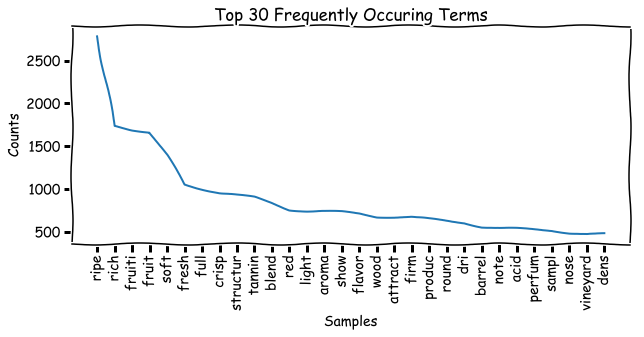

In [26]:
word_counter(base,'country','France')

aroma 	 1685
blend 	 1234
cabernet 	 940
fruit 	 607
sauvignon 	 571
merlot 	 493
note 	 492
syrah 	 470
herb 	 466
spice 	 378
vineyard 	 359
come 	 304
light 	 299
variet 	 298
red 	 288
vanilla 	 277
offer 	 234
barrel 	 223
lead 	 219
new 	 204


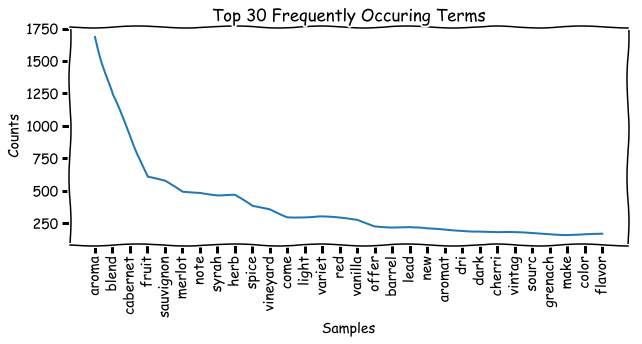

In [27]:
word_counter(base,'province','Washington')

note 	 402
nose 	 277
aroma 	 229
lend 	 218
fresh 	 217
cherri 	 217
appl 	 211
ripe 	 207
hint 	 169
spice 	 155
smoke 	 146
whiff 	 146
savori 	 137
tone 	 125
perfum 	 119
flavor 	 116
miner 	 116
lemon 	 114
blossom 	 111
black 	 109


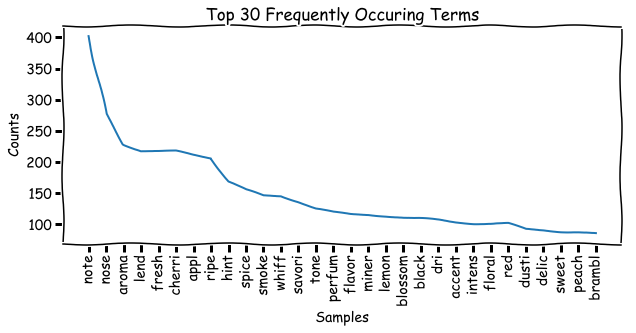

In [28]:
word_counter(base,'province','New York')

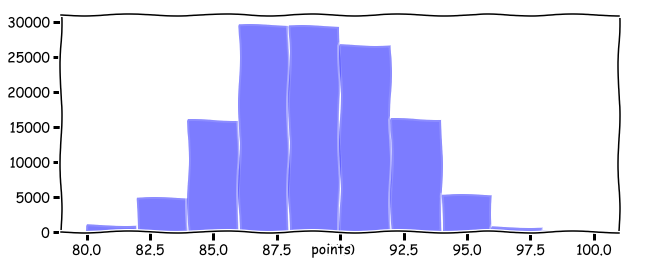

<ggplot: (-9223371910824073072)>

In [29]:

ggplot(aes(x='points'), data=base) + \
        geom_histogram(alpha = 0.3,fill = 'blue') +\
        theme_xkcd()

In [30]:
import statsmodels.api as sm
values = {'price': np.mean(base['price']), 'points': np.mean(base['points'])}
base = base.fillna(value=values)

X = base["price"]
y = base["points"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                 1.095e+05
Date:                Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:52:00   Log-Likelihood:            -7.2737e+05
No. Observations:              129971   AIC:                         1.455e+06
Df Residuals:                  129970   BIC:                         1.455e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          1.1275      0.003    330.902      0.000       1.121       1.134
==============================================================================
Omnibus:                   286346.504   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5192141705.601
Skew:                         -19.821   Prob(JB):                         0.00
Kurtosis:                     981.362   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Feature Engineering
* Reduce the number of levels by creating an "other" category
* Keeps the top 10 levels and turns all other countries to "Other region"

In [31]:
top10Country = base['country'].value_counts(ascending=False).reset_index().head(10)['index'].tolist()
base['CountryNew'] = np.where(base['country'].isin(top10Country), base['country'], 'Other Region')
base['CountryNew'].value_counts()

US              54504
France          22093
Italy           19540
Spain            6645
Portugal         5691
Other Region     5387
Chile            4472
Argentina        3800
Austria          3345
Australia        2329
Germany          2165
Name: CountryNew, dtype: int64

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
def createDTM(messages):
    vect = TfidfVectorizer(max_features = 50,stop_words = 'english')
    dtm = vect.fit_transform(messages) # create DTM
    
    # create pandas dataframe of DTM
    return pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names()) 

In [33]:
textCols = createDTM(base['description'])
textCols.head()

,acidity,apple,aromas,berry,black,blackberry,blend,bodied,bright,cabernet,...,ripe,shows,soft,spice,sweet,tannins,texture,vanilla,white,wine
0,0.357546,0.513303,0.336527,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.246356,0.000000,0.000000,0.329396,0.0,0.0,0.0,0.0,0.0,0.0,...,0.276145,0.0,0.0,0.0,0.0,0.260073,0.0,0.0,0.0,0.178946
2,0.345965,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.251299
3,0.000000,0.000000,0.358267,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.420003


In [34]:
fullData = base.join(textCols)
fullData.info()
colsToDrop = ['country','description','designation','province','region_1','region_2','taster_name','taster_twitter_handle','title','winery','variety']
fullData = fullData.drop(colsToDrop, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 65 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    129971 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
CountryNew               129971 non-null object
acidity                  129971 non-null float64
apple                    129971 non-null float64
aromas                   129971 non-null float64
berry                    1

In [35]:
features = pd.get_dummies(data=fullData, columns=['CountryNew'],prefix ='country_')
features.head()

,Unnamed: 0,points,price,acidity,apple,aromas,berry,black,blackberry,blend,...,country__Australia,country__Austria,country__Chile,country__France,country__Germany,country__Italy,country__Other Region,country__Portugal,country__Spain,country__US
0,0,87,35.363389,0.357546,0.513303,0.336527,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1,87,15.000000,0.246356,0.000000,0.000000,0.329396,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,2,87,14.000000,0.345965,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,3,87,13.000000,0.000000,0.000000,0.358267,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,4,87,65.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
values = {'price': np.mean(features['price']), 'points': np.mean(features['points'])}
features = features.fillna(value=values)

X = features.loc[:,features.columns !='points']
y = features["points"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     953.0
Date:                Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:52:07   Log-Likelihood:            -3.0456e+05
No. Observations:              129971   AIC:                         6.092e+05
Df Residuals:                  129908   BIC:                         6.099e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Unnamed: 0             2.766e-07   1.86e-07      1.484      0.138   -8.88e-08    6.42e-07
price                     0.0255      0.000    139.311      0.000       0.025       0.026
acidity                   1.0910      0.054     20.160      0.000       0.985       1.197
apple                     1.3158      0.057     23.074      0.000       1.204       1.428
aromas                    0.4512      0.063      7.169      0.000       0.328       0.575
berry                     1.0874      0.059     18.564      0.000       0.973       1.202
black                     2.3895      0.052     45.651      0.000       2.287       2.492
blackberry                1.5974      0.060     26.808      0.000       1.481       1.714
blend                     0.8991      0.061     14.836      0.000       0.780       1.018
bodied                    0.7603      0.060     12.770      0.000       0.644       0.877
bright                    1.1818      0.062     19.032      0.000       1.060       1.304
cabernet                  1.3817      0.060     23.072      0.000       1.264       1.499
cherry                    0.6316      0.055     11.455      0.000       0.524       0.740
chocolate                 1.9269      0.066     28.983      0.000       1.797       2.057
citrus                    1.1809      0.058     20.295      0.000       1.067       1.295
crisp                     0.3181      0.059      5.366      0.000       0.202       0.434
dark                      2.2785      0.060     37.858      0.000       2.161       2.396
drink                     2.0427      0.057     35.664      0.000       1.930       2.155
dry                       0.0258      0.053      0.487      0.627      -0.078       0.130
finish                    1.0678      0.057     18.810      0.000       0.956       1.179
firm                      2.2805      0.067     33.897      0.000       2.149       2.412
flavors                  -0.4671      0.060     -7.847      0.000      -0.584      -0.350
fresh                     1.1616      0.055     21.026      0.000       1.053       1.270
fruit                     1.2828      0.049     26.392      0.000       1.188       1.378
fruits                    1.5089      0.064     23.726      0.000       1.384       1.634
fruity                   -0.6862      0.063    -10.833      0.000      -0.810      -0.562
good                      0.2665      0.061      4.404      0.000       0.148       0.385
green                    -0.3994      0.061     -6.574      0.000      -0.519      -0.280
juicy                     1.6442      0.066     25.042      0.000       1.515       1.773
lemon                     1.8644      0.060     30.917      0.000       1.746       1.983
light                    -0.4428      0.056     -7.869      0.000      -0.553      -0.333
nose                   

#### Review Regression after adding country
* R squared reduced significantly
* p-values are significant for every column

---
### Random Forest Classifier

In [37]:
labels = np.array(features['points'])
features= features.drop('points', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [38]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [39]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (97478, 63)
Training Labels Shape: (97478,)
Testing Features Shape: (32493, 63)
Testing Labels Shape: (32493,)


In [40]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [41]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'points.')

Mean Absolute Error: 1.64 points.


In [42]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.15 %.


In [43]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: price                Importance: 0.37
Variable: Unnamed: 0           Importance: 0.05
Variable: flavors              Importance: 0.03
Variable: wine                 Importance: 0.03
Variable: acidity              Importance: 0.02
Variable: aromas               Importance: 0.02
Variable: drink                Importance: 0.02
Variable: finish               Importance: 0.02
Variable: fruit                Importance: 0.02
Variable: palate               Importance: 0.02
Variable: rich                 Importance: 0.02
Variable: ripe                 Importance: 0.02
Variable: soft                 Importance: 0.02
Variable: sweet                Importance: 0.02
Variable: apple                Importance: 0.01
Variable: berry                Importance: 0.01
Variable: black                Importance: 0.01
Variable: blackberry           Importance: 0.01
Variable: blend                Importance: 0.01
Variable: bodied               Importance: 0.01
Variable: bright               Importanc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]